# Overviews
We are analysis the text with the help of monkeylearn API We can do extractions classification using the monkeylearn models
.Fist We have to loging is the monkeylearn web page and get the API key and model ID For what we have to create
.Once we get the api Id and model id we can do the start our process of extraction or classification

In [1]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk import  FreqDist, ConditionalFreqDist.
# from nltk.corpus import stopwords.

from monkeylearn import MonkeyLearn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from textblob import TextBlob
ml = MonkeyLearn('540cd9714933be68edc9b16b5e42ed0f279f4ff0')
import json
import pandas as pd

Enter the text:-
''  Alamos Gold Inc. (“Alamos” or the “Company”) is a Canadian-based intermediate gold producer with assets in Canada, Mexico, Turkey and the United States. Our values of safety, teamwork, environmental sustainability, integrity and commitment serve as our foundation for doing business the right way with employees, communities, contractors and suppliers. //• Ensure a work environment that complies with the International Labor Organization’s Declaration of Fundament Principles and Rights at Work including: o Upholding freedom of association and the effective recognition of the right to collective bargaining, o Supporting the elimination of all forms of modern slavery including forced and compulsory labour, o Supporting the effective abolition of child labour; and o Eliminating discrimination in respect of employment and occupation. Health and safety Suppliers are required to follow safe work practices and comply with all applicable health and safety guidelines relating 

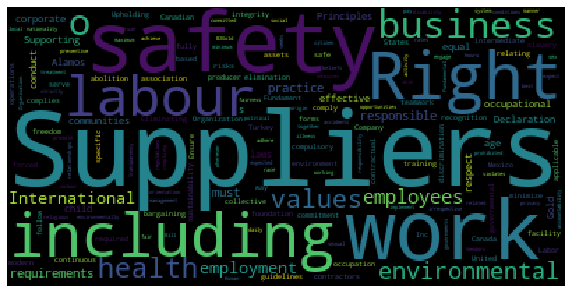

In [19]:
#Put The data in side the text bar

my_text = input("Enter the text:-\n") 
temp = 0

#using the NLTK Method
# token = my_text.split()
# print(token)

print("             ")

print(" We calculate the value of the data ",end=" ")

print("      \n      ")

#Here is the collect the data inside the data value.
data = [my_text]
#We put the model key world.
#This keyword is use to extract the work
model_id = 'ex_y7BPYzNG'
#This keywords is use to classification the text('cl_pi3C7JiL')
#Extract the dta using the mobel id. 
result = ml.extractors.extract(model_id,data,production_model=False)

dataDict = result.body


def items():
    
    for item in dataDict[0]['extractions'][:10]: 
        print(item['parsed_value'],"\n" ,"count:-",item['count'],"Relevance:-",item['relevance'])
        

        

items() 

    

    
#This is help to count the sentance that which sentace repeted how.               
               
# blog = TextBlob(newdict['parsed_value']).
# print(blog.word_counts).

#From visualization we use the world cloud that help to visualiz the data.

wordcloud = WordCloud(max_font_size=90,background_color='black',mode='CMYK',).generate(my_text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation='nearest',interpolation_stage='rgba')
plt.axis("off")
plt.show()

In [18]:
print(json.dumps(result.body,indent=2,allow_nan=1))
# #We put the model key world. 
# model_id = 'ex_y7BPYzNG'
# #Extract the dta using the mobel id. 
# result = ml.extractors.extract(model_id,data,retry_if_throttled=True)

# dataDict = result.body
# (dataDict,"\n")

[
  {
    "text": "''  Alamos Gold Inc. (\u201cAlamos\u201d or the \u201cCompany\u201d) is a Canadian-based intermediate gold producer with assets in Canada, Mexico, Turkey and the United States. Our values of safety, teamwork, environmental sustainability, integrity and commitment serve as our foundation for doing business the right way with employees, communities, contractors and suppliers. //\u2022 Ensure a work environment that complies with the International Labor Organization\u2019s Declaration of Fundament Principles and Rights at Work including: o Upholding freedom of association and the effective recognition of the right to collective bargaining, o Supporting the elimination of all forms of modern slavery including forced and compulsory labour, o Supporting the effective abolition of child labour; and o Eliminating discrimination in respect of employment and occupation. Health and safety Suppliers are required to follow safe work practices and comply with all applicable health

In [4]:
type(result.body)


list

In [5]:
data = pd.DataFrame(result.body)

In [6]:
type(data)


pandas.core.frame.DataFrame

The result looks great the Extraction are buried inside a dictionary. To include them as a new column (in a new
table), we can use the argument meta to specify a list of additional data we want from the result. (This takes a list as
an argument, but 'external_id' is "None" and 'error' is "False", so actually we don't really need those columns.)                                                                                                   

Now it's easy to load the data into a new dataframe to manipulate it easily. We can use the json_normalize() 
method again to extract just the things we want from the source data. Here, we are excluding external_id and
error since they aren't usefulm

In [15]:
data = pd.json_normalize(result.body, record_path = ['extractions'],meta_prefix=['text'])

In [16]:
data

,tag_name,parsed_value,count,relevance,positions_in_text
0,KEYWORD,Suppliers,7,0.970,"[346, 861, 1120, 1220, 1658, 1887, 2559]"
1,KEYWORD,Fundamental Principles,2,0.894,"[460, 2490]"
2,KEYWORD,child labour,2,0.894,"[755, 1845]"
3,KEYWORD,Employment practices Suppliers,1,0.745,[1637]
4,KEYWORD,intermediate gold producer,1,0.745,[69]
5,KEYWORD,local employment laws,1,0.745,[1683]
6,KEYWORD,safe work practices,1,0.745,[894]
7,KEYWORD,International Labour Organisation,1,0.745,[2439]
8,KEYWORD,Alamos Gold Inc.,1,0.745,[4]
9,KEYWORD,responsible corporate citizen,1,0.745,[2137]


In [38]:
data.to_csv("ketan.csv")